## Digit Recognizer
### Learn computer vision fundamentals with the famous MNIST data

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Imports

In [72]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
# for training
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

### Loading the dataset

In [4]:
# load MNIST dataset
train = pd.read_csv('datasets/mnist/train.csv', header=0)
test = pd.read_csv('datasets/mnist/test.csv', header=0)

print('train shape', train.shape)
print('test shape', test.shape)

train shape (42000, 785)
test shape (28000, 784)


### Exploring the raw data

In [31]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [32]:
train.head(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
test.head(4)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot sample images using raw data

In [27]:
def plotSamples():
    fig, axes = plt.subplots(1, 5, sharey='row', figsize=(10, 4))
    plot_num = 0
    for idx in list(np.random.randint(0, train.shape[0], 5)):
        axes[plot_num].imshow(train.iloc[idx].values[1:].reshape((28, 28)), cmap='gray')
        plot_num += 1

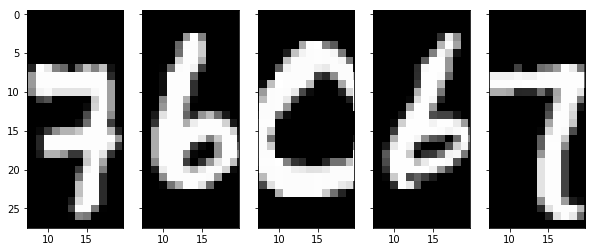

In [28]:
plotSamples()

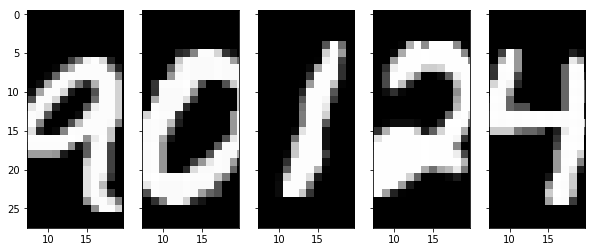

In [29]:
plotSamples()

### Lets get started with the data

In [61]:
#X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
#Y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
#X_test = test.values.astype('float32')
#Y_test = test.values.astype('float32')

# split data for validation
X_train, X_test, Y_train, Y_test = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.2, random_state=10)

## Model 1 : Naive Bayes

In [39]:
naiveBayes = MultinomialNB()
naiveBayes.fit(X_train, Y_train)
predictions = naiveBayes.predict(X_test)

submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("datasets/mnist/mnist_01.csv", index=False, header=True)

## Model 2 : Linear Regression

In [42]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
predictions = linearRegression.predict(X_test).astype(int)
np.sort(predictions)

array([-34, -17,  -5, ...,  13,  14,  15])

In [43]:
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("datasets/mnist/mnist_02.csv", index=False, header=True)

## Model 3 : K-Nearest Neighbors

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [45]:
predictions = knn.predict(X_test)
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("datasets/mnist/mnist_03.csv", index=False, header=True)

## Model 4 : Support Vector Machines (SVM)

In [58]:
# Standardize data (normalize and center)
scalerX = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

#### Reduce dimensionality

In [59]:
# reduce number of dimensions by dropping columns with low variance
low_var_index = []
var_tol = 1 # might need to scan over this value
num_features = len(train.columns)-1

for i in range(num_features):
    if ( np.var(X_train_scaled[:, i]) > var_tol ): low_var_index.append(i)

X_train_scaled_dimred = X_train_scaled[:, low_var_index]
X_test_scaled_dimred = X_test_scaled[:, low_var_index]
X_train_scaled_dimred.shape
X_test_scaled_dimred.shape

(8400, 250)

#### Train model

In [62]:
# SVM Classifier
svc = svm.SVC(C=100)
svc.fit(X_train_scaled_dimred, Y_train)
svc.score(X_test_scaled_dimred, Y_test)

0.9615476190476191

The model seems pretty good. So, lets train on the entire training set to improve accuracy.

In [63]:
# recombine dataset splits
X_full = np.concatenate((X_train_scaled_dimred, X_test_scaled_dimred), axis=0)
Y_full = np.concatenate((Y_train, Y_test), axis=0)

# train model on full training dataset
svc_full = svm.SVC(C=100)
svc_full.fit(X_full, Y_full)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Prediction

In [64]:
# pre-process test set
test_scaled = scalerX.transform(test)
test_scaled_dimred = test_scaled[:, low_var_index]
test_scaled_dimred.shape

(28000, 250)

In [65]:
submission = svc_full.predict(test_scaled_dimred)

# convert prediction to a dataframe with the appropriate index and column label for submission
submission_df = pd.DataFrame(submission, columns=['Label'])
submission_df.index += 1
submission_df.head(4)

,Label
1,2
2,0
3,9
4,9


In [66]:
# write submission to csv
submission_df.to_csv("datasets/mnist/mnist_04.csv", index_label='ImageId')

## Model 5 : One Vs Rest

In [68]:
# Define and train model
classif = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(10,10 ), alpha=1, verbose=0))
classif.fit(X_train, Y_train)
Y_pred = classif.predict(X_test)
print("Training set score: %f" % classif.score(X_train, Y_train))

Training set score: 0.986637


In [69]:
print("Testing set score: %f" % accuracy_score(Y_test, Y_pred))

Testing set score: 0.957143


In [70]:
confusion_matrix(Y_test, Y_pred)

array([[763,   0,   3,   2,   3,   3,  13,   0,   7,   2],
       [  0, 933,   3,   4,   1,   0,   0,   3,   2,   0],
       [  2,   3, 817,   5,   6,   0,   8,  10,   5,   0],
       [  0,   1,   9, 815,   0,  15,   1,   3,  11,   1],
       [  1,   0,   3,   0, 807,   1,   5,   1,   2,   6],
       [  0,   2,   2,  16,   1, 722,  13,   5,  12,   0],
       [  4,   2,   0,   0,   2,   1, 774,   0,   4,   0],
       [  0,   4,   7,   2,   3,   3,   0, 844,   1,   5],
       [  1,  11,   8,   7,   5,   6,   3,   2, 784,   9],
       [  1,   2,   2,   9,  33,   4,   0,  18,   5, 781]], dtype=int64)

In [71]:
submissions = pd.DataFrame({"ImageId": list(range(1,len(Y_pred)+1)), "Label": Y_pred})
submissions.to_csv("datasets/mnist/mnist_05.csv", index=False, header=True)

## Model 6 : Random Forest

In [73]:
# Values returns an array of pixel data from training set
X = train.values[:,1:]
# Test values returns an array of pixel data from test set
test_X = test.values
# response returns an array of labels
y = train.values[:,0].ravel()

#### Decision Tree Classifier

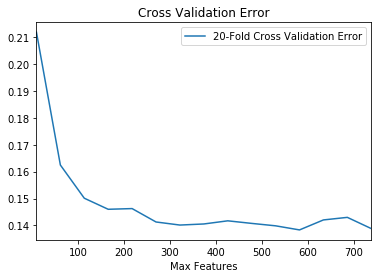

In [74]:
valid_scores = []
for x in range(10, X.shape[1], 52):
    clf = DecisionTreeClassifier(max_depth=None, max_features = x, min_samples_split=2, random_state = 0)
    scores = cross_val_score(clf, X, y, n_jobs=-1, cv = 20)
    valid_scores.append([x,scores.mean()])

df = pd.DataFrame(valid_scores)
df.columns = ["Max Features","20-Fold Cross Validation Error"]
df['20-Fold Cross Validation Error'] = 1 - df['20-Fold Cross Validation Error']
df.plot(x = "Max Features", y = "20-Fold Cross Validation Error", title = "Cross Validation Error")

In [75]:
clf = DecisionTreeClassifier(max_depth=None, max_features =  270, min_samples_split=2, random_state = 0)
scores = cross_val_score(clf, X, y, cv = 3, n_jobs=-1)

print("Estimated Test Error:", scores.mean())

Estimated Test Error: 0.843404803126


#### Extra Trees Classifier

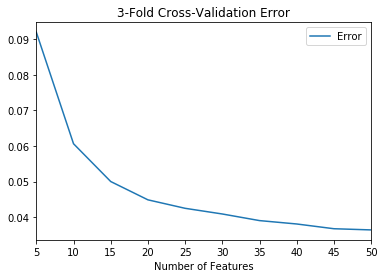

In [76]:
cross_scores = []
for x in range(0,55,5):
    if x == 0:
        pass
    else:
        clf = ExtraTreesClassifier(n_estimators = x, max_depth = None, min_samples_split = 2, random_state = 0)
        cross_scores.append([x,cross_val_score(clf, X, y, n_jobs=-1, cv =3).mean()])
        
df = pd.DataFrame(cross_scores)
df.columns = ["Number of Features","Error"]
df.Error = 1 - df.Error
df.plot(x="Number of Features", y="Error", title="3-Fold Cross-Validation Error")

In [77]:
clf = ExtraTreesClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state = 0)
scores = cross_val_score(clf, X, y, n_jobs=-1, cv = 3)

print("Estimated test error:", scores.mean())

Estimated test error: 0.955142926731


In [78]:
# Fit Final Model 
clf.fit(X,y)

#Organize prediction into arrays
Label = np.array(clf.predict(test_X))
ImageId = np.arange(start = 1, stop = Label.shape[0]+1)

# Save dataframe to csv 
df = pd.DataFrame({'ImageId': ImageId, 'Label': Label})
df.to_csv("datasets/mnist/mnist_06.csv", index_label = False, index = False)